1) Import required libraries

In [1]:
import pandas as pd
import numpy as np
import json
import requests
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed import folium # map rendering library
import folium
print('Import finished')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  53.61 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  36.60 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  40.20 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  48.30 MB/s
Import finished


2) Import data-sheet "Gemeinden" (German for "Communities")from excel-file from DESTATIS (German Federal Office for Statistics)

In [2]:
#https://www.destatis.de/DE/Themen/Laender-Regionen/Regionales/Gemeindeverzeichnis/_inhalt.html
#DESTATIS (German Federal Office for Statistics) provides file below 
path = 'https://www.destatis.de/DE/Themen/Laender-Regionen/Regionales/Gemeindeverzeichnis/Administrativ/Archiv/GVAuszugQ/AuszugGV4QAktuell.xlsx?__blob=publicationFile&v=3'
df = pd.DataFrame()
df = pd.read_excel(path, sheet_name = 'Onlineprodukt_Gemeinden_311218', header = None)

3) Check first (head) and last (tail) rows of imported file, in order to see what data-cleaning is required

In [3]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"Gemeinden in Deutschland nach Fläche, Bevölker...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Satz-art,Text-kenn-zeichen,Regionalschlüssel (RS),NaN,NaN,NaN,NaN,Gemeindename,Fläche km2 1),Bevölkerung2),NaN,NaN,NaN,Post-leit-zahl3),Geografische Mittelpunktkoordinaten,NaN,Reisegebiete,NaN,Grad der Verstädterung,NaN
3,NaN,NaN,Land,RB,Kreis,VB,Gem,NaN,NaN,insgesamt,männlich,weiblich,je km2,NaN,Längengrad,Breitengrad,NaN,NaN,NaN,NaN
4,NaN,NaN,Gebietsstand am 31.12.2018 (4. Quartal),NaN,NaN,NaN,NaN,NaN,am 31.12.2017 (Jahr),NaN,NaN,NaN,NaN,NaN,Zuordnungsstand am 31.12.2017,NaN,Schlüssel,Bezeichnung,Schlüssel,Bezeichnung
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,NaN,01,NaN,NaN,NaN,NaN,Schleswig-Holstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,40,41,01,0,01,NaN,NaN,"Flensburg, Stadt",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,50,50,01,0,01,0000,NaN,"Flensburg, Stadt",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,60,61,01,0,01,0000,000,"Flensburg, Stadt",56.73,88519,44086,44433,1560,24937,"9,43751","54,78252",F02,Ostsee,01,dicht besiedelt


In [4]:
df.tail(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
16069,60,64,16,0,77,5051,011,Göpfersdorf,5.93,235,119,116,40,04618,"12,595897","50,912971",E29,Übriges Thüringen,03,gering besiedelt
16070,60,64,16,0,77,5051,023,Langenleuba-Niederhain,39.44,1756,896,860,45,04618,"12,589232","50,960103",E29,Übriges Thüringen,03,gering besiedelt
16071,60,64,16,0,77,5051,036,Nobitz,100.36,7309,3668,3641,73,04603,"12,48554","50,977273",E29,Übriges Thüringen,03,gering besiedelt
16072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16073,Quelle: Gemeindeverzeichnis-Informationssytem ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16075,1) Abweichungen bei den Flächenangaben sind du...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16076,Aufgrund fachlicher und methodischer Umst...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16077,2) Die Ergebnisse ab Berichtsjahr 2016 sind au...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16078,nur bedingt mit den Vorjahreswerten vegle...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4) Clean dataframe, remove header and footer rows

In [5]:
df.drop(df.index[:6], inplace = True)
df.head(3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
6,10,NaN,01,NaN,NaN,NaN,NaN,Schleswig-Holstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,40,41,01,0,01,NaN,NaN,"Flensburg, Stadt",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,50,50,01,0,01,0000,NaN,"Flensburg, Stadt",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.drop(df.index[16066:], inplace = True)
df.tail(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
16069,60,64,16,0,77,5051,011,Göpfersdorf,5.93,235,119,116,40,04618,"12,595897","50,912971",E29,Übriges Thüringen,03,gering besiedelt
16070,60,64,16,0,77,5051,023,Langenleuba-Niederhain,39.44,1756,896,860,45,04618,"12,589232","50,960103",E29,Übriges Thüringen,03,gering besiedelt
16071,60,64,16,0,77,5051,036,Nobitz,100.36,7309,3668,3641,73,04603,"12,48554","50,977273",E29,Übriges Thüringen,03,gering besiedelt


5) Continue cleaning of dataframe, remove non needed column, create unique community identifier out 
of hierarchical elements (see column 0-6 above), create meaningful column headers, change data type 
to numeric for column containing numbers

In [7]:
df2 = df.drop([0,1,10,11,13,16,17,18,19], axis = 1)
df2[0] = df2[2]+df2[3]+df2[4]+df2[5]+df2[6]
df2 = df2.rename(columns={0:'Community-ID',7:'Community-Name',8:'Square-km',9:'Citizens',12:'Citizens-per-Square-km',14:'Longitude',15:'Latitude'})
df3 = df2.drop([2,3,4,5,6], axis = 1)
#Change data-type to INT for  Square-km, Citzens, Citizens per Square-km
df3['Square-km'] = df3['Square-km'].apply(lambda x: pd.to_numeric(x))
df3['Citizens'] = df3['Citizens'].apply(lambda x: pd.to_numeric(x))
df3['Citizens-per-Square-km'] = df3['Citizens-per-Square-km'].apply(lambda x: pd.to_numeric(x))

df3.head(4)

,Community-Name,Square-km,Citizens,Citizens-per-Square-km,Longitude,Latitude,Community-ID
6,Schleswig-Holstein,NaN,NaN,NaN,NaN,NaN,NaN
7,"Flensburg, Stadt",NaN,NaN,NaN,NaN,NaN,NaN
8,"Flensburg, Stadt",NaN,NaN,NaN,NaN,NaN,NaN
9,"Flensburg, Stadt",56.73,88519.0,1560.0,"9,43751","54,78252",010010000000


6) Continue cleaning of data and add new columns: Calculate "Radius" from "Square-km", 
    replace "," in Longitude/Latitude by ".". Remove irrelevant part of community-name

In [8]:
df3["Radius-m"]= ((df3["Square-km"]/3.14159265)**0.5)*1000
df3["Radius-m"] = df3["Radius-m"].round(0)
df3['Longitude'] = df3['Longitude'].str.replace(',', '.')
df3['Latitude'] = df3['Latitude'].str.replace(',', '.')
df3.head(3)

# Split "Community-Name" and keep only part before ","
new = df3["Community-Name"].str.split(", ", n = 1, expand = True) 
# making seperate first name column from new data frame 
df3["Community"]= new[0] 
# making seperate last name column from new data frame - not needed just to check
#data["Last Name"]= new[1] 
  
# Dropping old Name columns 
df3.drop(columns =["Community-Name"], inplace = True) 
df3.head(3)

,Square-km,Citizens,Citizens-per-Square-km,Longitude,Latitude,Community-ID,Radius-m,Community
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Schleswig-Holstein
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Flensburg
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Flensburg


7) Set limit on dataframe, so only communities with a minimum and maximum number of citizens are included,
and minimum density of citizens per square-km (so excluding rural areas). As a result, only communities that are
midsized cities will be regarded.

In [9]:
df3.sort_values(by=['Citizens-per-Square-km'], ascending=False, inplace=True)
df3a = df3.loc[(df3['Citizens-per-Square-km'] >= 1000)]
df3b = df3a.loc[(df3a['Citizens'] >= 40000)]
df4 = df3b.loc[(df3b['Citizens'] <= 400000)]
df4.reset_index(drop=True,inplace=True)

df4.head()

,Square-km,Citizens,Citizens-per-Square-km,Longitude,Latitude,Community-ID,Radius-m,Community
0,51.42,156490.0,3043.0,7.222793,51.540365,059160000000,4046.0,Herne
1,44.88,126658.0,2822.0,8.764442,50.105567,064130000000,3780.0,Offenbach am Main
2,77.09,211422.0,2743.0,6.852291,51.470317,051190000000,4954.0,Oberhausen
3,145.66,365529.0,2509.0,7.217177,51.482699,059110000000,6809.0,Bochum
4,104.94,260305.0,2481.0,7.096064,51.510892,055130000000,5780.0,Gelsenkirchen


8) Creating credentials for Foursquare.

REMOVE Client-ID and Client-Secret before publishing

In [10]:
CLIENT_ID = REMOVED # your Foursquare ID
CLIENT_SECRET = REMOVED # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50
#rad = 1000
search_query = '4bf58dd8d48988d16e941735' #WILL CREATE A QUERY-LIMIT ON "Category -> FASTFOOD"
#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

9) Create function for get-request on Foursquare-API and to save results in new dataframe

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius, cid):
    
    venues_list=[]
    for name, lat, lng, radius,cid in zip(names, latitudes, longitudes, radius, cid):
        #print(name) - helps to check if query in fact runs on all communities
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
        
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng,
            VERSION,
            search_query,#CATEGORY,Venues
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']#['name']#[0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            cid,
            lat, 
            lng,
            radius,
            v['name'],
            v['categories'][0]['name'],
            v['categories'][0]['primary']
            #v['location']['state']
            ) for v in results])
            
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City','Community-ID','City-Latitude','City-Longitude','City-Radius','Venue-Name','Venue-Category','Category-Primary']
                      
    return(nearby_venues)

10) Run get-request on Foursquare-API

In [12]:
germany_venues_raw = getNearbyVenues(names=df4['Community'],
                                 latitudes=df4['Latitude'],
                                 longitudes=df4['Longitude'],
                                 radius=df4['Radius-m'],
                                 cid=df4['Community-ID']
                                )

11) Preliminary Check: Control whether any community got 50 venues returned. 50 is defined as the max, 
    so it actually could be more and they just got capped at 50. In case more are returned, evaluate whether 
    results are signifcantly influenced. Or otherwise, refine limits in step 7 to include only smaller cities (with presumably fewer fastfood-venues)

In [13]:
germany_venues_test = germany_venues_raw.groupby('Community-ID').count()
germany_venues_test.sort_values(by=['Venue-Name'], ascending=False, inplace=True)
germany_venues_test.head(3)

,City,City-Latitude,City-Longitude,City-Radius,Venue-Name,Venue-Category,Category-Primary
Community-ID,,,,,,,
051190000000,50,50,50,50,50,50,50
051620024024,50,50,50,50,50,50,50
082220000000,49,49,49,49,49,49,49


12) By Foursquare returned venues sometimes have Category "Fastfood" only as a secondary category. So, 
primary category is something else. To get only "true" fastfood restaurants, remove those that have another
primary category

In [14]:
#Check content of Germany_venues_raw
#germany_venues_raw.head(100)
germany_venues_raw2 = germany_venues_raw.loc[(germany_venues_raw['Venue-Category'] == 'Fast Food Restaurant')]
germany_venues_raw2.head(2)

,City,Community-ID,City-Latitude,City-Longitude,City-Radius,Venue-Name,Venue-Category,Category-Primary
0,Herne,059160000000,51.540365,7.222793,4046.0,Pim & Pom Store,Fast Food Restaurant,True
2,Herne,059160000000,51.540365,7.222793,4046.0,McDonald's,Fast Food Restaurant,True


13) Group venues by communities (i.e. Cities), so for each community the number of fastfood restaurants is returned.

In [15]:
germany_venues_raw3 = germany_venues_raw2.groupby('Community-ID').count()
germany_venues_raw4 = germany_venues_raw3.drop(['City','City-Latitude','City-Longitude','City-Radius','Venue-Category','Category-Primary'], axis=1)
germany_venues_raw4.rename(columns={'Venue-Name':'Restaurants'}, 
                 inplace=True)
germany_venues_raw4.reset_index(inplace=True)#transform "Community-ID" from index into a ...
                                             #... regular column, so it can be used as matching criterion in next step.
germany_venues_raw4.head(2)

,Community-ID,Restaurants
0,010010000000,18
1,010020000000,25


14) Join demographics-dataframe with fastfood-venues-dataframe. This builds the basis for the analysis

In [16]:
total_data = pd.merge(df4,germany_venues_raw4, on=['Community-ID'],how='left')
total_data = total_data.fillna(0) #Some cities have no fastfood restaurant at all. Set "NaN"-restaurants for these to "0"
total_data.head()

,Square-km,Citizens,Citizens-per-Square-km,Longitude,Latitude,Community-ID,Radius-m,Community,Restaurants
0,51.42,156490.0,3043.0,7.222793,51.540365,059160000000,4046.0,Herne,11.0
1,44.88,126658.0,2822.0,8.764442,50.105567,064130000000,3780.0,Offenbach am Main,13.0
2,77.09,211422.0,2743.0,6.852291,51.470317,051190000000,4954.0,Oberhausen,36.0
3,145.66,365529.0,2509.0,7.217177,51.482699,059110000000,6809.0,Bochum,42.0
4,104.94,260305.0,2481.0,7.096064,51.510892,055130000000,5780.0,Gelsenkirchen,38.0


15) Correlation analysis: To what attributes does the number of restaurants per city 
    have a statistically significant correlation?

In [17]:
#Correlation Analysis 
total_data.corr()

,Square-km,Citizens,Citizens-per-Square-km,Radius-m,Restaurants
Square-km,1.000000,0.871971,-0.062448,0.986172,0.677415
Citizens,0.871971,1.000000,0.364648,0.882394,0.826068
Citizens-per-Square-km,-0.062448,0.364648,1.000000,-0.058223,0.342734
Radius-m,0.986172,0.882394,-0.058223,1.000000,0.706854
Restaurants,0.677415,0.826068,0.342734,0.706854,1.000000


16) Check p-value

In [18]:
pearson_coef, p_value = stats.pearsonr(total_data['Citizens'], total_data['Restaurants'])
#p= "{:20.18f}".format(p_value)
#p = format(p_value, '.20f')
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =",p_value)

The Pearson Correlation Coefficient is 0.826067605318  with a P-value of P = 1.14843855522e-30


17) Visualize correlation in a linear-regression-plot

(0, 44.450005538238706)

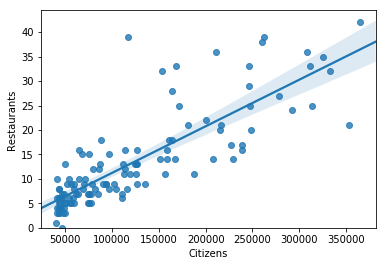

In [19]:
sns.regplot(x="Citizens", y="Restaurants", data=total_data)
plt.ylim(0,)

18) For further analysis: Calculate a new colum "Rest_to_Cit_Ratio" in order to show the ratio of restaurants
in a city relative to the number of citizens in that city. 
A value of "1" should more or less follow the regression line, meaning 1 restaurant per 10,000 citizens. 
So, "> 1" has more restaurants than average related to number of citizesn, "<1" has fewer restaurants.
NB: "1" is always added to number of actual restaurants, indicating already status after a new restaurant be setup.

In [20]:
total_data['Rest_to_Cit_Ratio'] = (((total_data['Restaurants'])+1)*10000)/(total_data['Citizens'])
total_data.head(2)

,Square-km,Citizens,Citizens-per-Square-km,Longitude,Latitude,Community-ID,Radius-m,Community,Restaurants,Rest_to_Cit_Ratio
0,51.42,156490.0,3043.0,7.222793,51.540365,059160000000,4046.0,Herne,11.0,0.766822
1,44.88,126658.0,2822.0,8.764442,50.105567,064130000000,3780.0,Offenbach am Main,13.0,1.105339


19) Prepare dataframe (drop unnecessary columns) for consequent k-means calculation to group cities 
regarding their geographical proximity to each other.

In [21]:
#Cluster Input-Dataframe
#total_data.head()
cluster_prepare_data = total_data.drop(["Square-km","Citizens","Citizens-per-Square-km","Radius-m","Restaurants","Rest_to_Cit_Ratio"], axis = 1)
#df4.drop(columns =["Community-Name"], inplace = True) 
#clustering_data.head()
geo_cluster = cluster_prepare_data.set_index(['Community', 'Community-ID'])
geo_cluster.head(2)

,,Longitude,Latitude
Community,Community-ID,,
Herne,059160000000,7.222793,51.540365
Offenbach am Main,064130000000,8.764442,50.105567


20) Run k-means clustering to group communities on their geographical proximity. 
Check result on map, and if necessary try different k to get relevant and more meaningful groups.

In [22]:
#k-means Clustering
#Run k-means to cluster communities into x clusters.
# set number of clusters
kclusters = 15
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(geo_cluster)


21) Add result from clustering to cluster-dataframe

In [23]:
# add clustering labels
geo_cluster['Cluster_Labels'] = kmeans.labels_
geo_cluster['Longitude'] = geo_cluster['Longitude'].apply(lambda x: pd.to_numeric(x))#transform to numeric for nex steps
geo_cluster['Latitude'] = geo_cluster['Latitude'].apply(lambda x: pd.to_numeric(x)) #transform to numeric for nex steps
geo_cluster.head(3)

,,Longitude,Latitude,Cluster_Labels
Community,Community-ID,,,
Herne,059160000000,7.222793,51.540365,12
Offenbach am Main,064130000000,8.764442,50.105567,6
Oberhausen,051190000000,6.852291,51.470317,12


22) Visualize geographical position of cities and assignment to clusters

In [24]:
# create map
#Germany Center
latitude = 51.5412804
longitude = 9.9158035
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(geo_cluster['Latitude'], geo_cluster['Longitude'], geo_cluster['Cluster_Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

23) Add cluster_labels to overview-dataframe "Total_data" (see above)

In [25]:
total_data_cluster = total_data.set_index(['Community-ID'])
total_data_cluster['Cluster_Labels'] = kmeans.labels_
total_data_cluster.head(2)

,Square-km,Citizens,Citizens-per-Square-km,Longitude,Latitude,Radius-m,Community,Restaurants,Rest_to_Cit_Ratio,Cluster_Labels
Community-ID,,,,,,,,,,
059160000000,51.42,156490.0,3043.0,7.222793,51.540365,4046.0,Herne,11.0,0.766822,12
064130000000,44.88,126658.0,2822.0,8.764442,50.105567,3780.0,Offenbach am Main,13.0,1.105339,6


24) Aggregate data for comprehensive view on clusters, remove irrelevant columns and calculate "total" 
Restaurants-to-City-Ratio, meaning sum of restaurants in a cluster related to sum of citizens in a cluster

In [26]:
cluster_overview = total_data_cluster
cluster_overview['Count_Communities']=1
cluster_overview2 = cluster_overview.drop(['Square-km','Citizens-per-Square-km','Radius-m','Longitude','Latitude','Community','Rest_to_Cit_Ratio'], axis = 1)
cluster_overview2 = cluster_overview2.groupby('Cluster_Labels').sum()
cluster_overview2['Rest_to_Cit_Ratio_TOTAL'] = (cluster_overview2['Restaurants']*10000)/(cluster_overview2['Citizens'])
#cluster_overview2.sort_values(by=['Rest_to_Cit_Ratio_TOTAL'])
cluster_overview2.sort_index()

,Citizens,Restaurants,Count_Communities,Rest_to_Cit_Ratio_TOTAL
Cluster_Labels,,,,
0,1168293.0,135.0,12,1.155532
1,989054.0,112.0,6,1.132395
2,711481.0,68.0,5,0.955753
3,507951.0,44.0,6,0.866225
4,369718.0,33.0,4,0.892572
5,692315.0,87.0,5,1.256653
6,1933395.0,229.0,15,1.184445
7,878759.0,98.0,8,1.115209
8,1042725.0,134.0,10,1.285094


25) Plot "restaurants per city" (total numbers) regarding to clusters

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


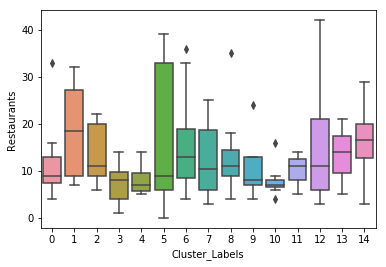

In [27]:
sns.boxplot(x="Cluster_Labels", y="Restaurants", data=total_data_cluster)

26) Plot "restaurants to city ratio":(relative number of restaurants related to number of citizens) for cities 
regarding to clusters

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


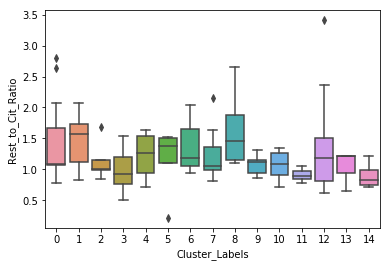

In [28]:
sns.boxplot(x="Cluster_Labels", y="Rest_to_Cit_Ratio", data=total_data_cluster)

27) Show clusters with lowest total "Restaurants to Citizens" ratio.

In [29]:
co2_temp = cluster_overview2.sort_values(by=['Rest_to_Cit_Ratio_TOTAL'], ascending=True)
co2_temp.head(9)


,Citizens,Restaurants,Count_Communities,Rest_to_Cit_Ratio_TOTAL
Cluster_Labels,,,,
11,357628.0,30.0,3,0.838860
14,768058.0,65.0,4,0.846290
3,507951.0,44.0,6,0.866225
13,459815.0,40.0,3,0.869915
4,369718.0,33.0,4,0.892572
9,614696.0,56.0,5,0.911019
10,609555.0,56.0,7,0.918703
2,711481.0,68.0,5,0.955753
7,878759.0,98.0,8,1.115209


28) Detail analysis on communities belonging to selected cluster

In [30]:
total_data_cluster_detail = total_data_cluster.loc[(total_data_cluster['Cluster_Labels'] == 3)]
tdcd2 = total_data_cluster_detail.sort_values(by=['Rest_to_Cit_Ratio'], ascending=True)
tdcd2

,Square-km,Citizens,Citizens-per-Square-km,Longitude,Latitude,Radius-m,Community,Restaurants,Rest_to_Cit_Ratio,Cluster_Labels,Count_Communities
Community-ID,,,,,,,,,,,
091790123123,21.60,40285.0,1865.0,11.364874,48.130916,2622.0,Germering,1.0,0.496463,3,1
091610000000,133.35,135244.0,1014.0,11.423387,48.76542,6515.0,Ingolstadt,9.0,0.739404,3,1
091740115115,34.96,47255.0,1352.0,11.437493,48.263327,3336.0,Dachau,3.0,0.846471,3,1
093620000000,80.85,150894.0,1866.0,12.097392,49.017834,5073.0,Regensburg,14.0,0.994075,3,1
091630000000,37.22,63080.0,1695.0,12.128932,47.856358,3442.0,Rosenheim,7.0,1.268231,3,1
092610000000,65.83,71193.0,1081.0,12.15892,48.538623,4578.0,Landshut,10.0,1.545096,3,1


29) Prepare data types for final visualization of selected cluster

In [32]:
total_data_cluster_detail['Longitude'] = total_data_cluster_detail['Longitude'].apply(lambda x: pd.to_numeric(x))
total_data_cluster_detail['Latitude'] = total_data_cluster_detail['Latitude'].apply(lambda x: pd.to_numeric(x))

30) Final visualization fo selected cluster
Size of circle indicates number of citizens 
Opacity of fill-color indicates restaurants-to-citizens-ratio, 
    where "transparent" means low restaurants-to-citizens-ratio
    and "opaque" means high restaurants-to-citizens-ratio

In [33]:
# create map
#Center around City of "Freising"
latitude = 48.4028796
longitude = 11.7411846
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster,cit,RtC in zip(total_data_cluster_detail['Latitude'], total_data_cluster_detail['Longitude'], total_data_cluster_detail['Community'],total_data_cluster_detail['Citizens'],total_data_cluster_detail['Rest_to_Cit_Ratio']):
    label = folium.Popup(' City ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=(cit/10000),
        popup=label,
        color= 'green',#rainbow[cluster-1],
        fill=True,
        fill_color = 'red',#rainbow[cluster-1],
        fill_opacity=RtC**3).add_to(map_clusters)
       
map_clusters